In [1]:
!pip install --upgrade pandas_datareader


In [2]:
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%%**********************]  6 of 6 completed
[0.13428814 0.22617087 0.18014335 0.19352061 0.26087753 0.00499951]
AAPL     0.001535
BHP     -0.000251
CBA      0.006171
GOOGL    0.001882
TLS     -0.001768
TSLA     0.003270
dtype: float64
[[ 0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354   0.0015354
   0.00153

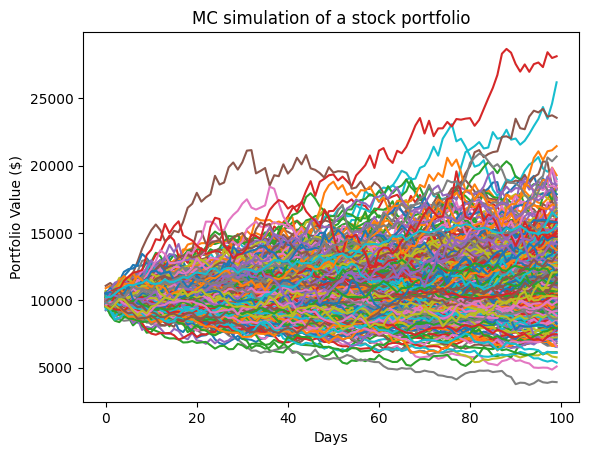

In [15]:
yf.pdr_override()
def get_data(stocks, start, end):
    stockData = yf.download(stocks,start,end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['CBA', 'BHP', 'TLS', 'GOOGL', 'AAPL', 'TSLA']
stocks = [stock for stock in stockList]
endDate = datetime.datetime.now()
startDate = endDate - datetime.timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, start = startDate, end = endDate)



print(weights)
print(meanReturns)

# Monte Carlo Method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(meanReturns)), fill_value=meanReturns)
meanM = meanM.T
print(meanM)

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    weights = np.random.random(len(meanReturns))
    weights /= np.sum(weights)
    Z = np.random.normal(size=(T, len(weights)))#uncorrelated RV's
    L = np.linalg.cholesky(covMatrix) #Cholesky decomposition to Lower Triangular Matrix
    dailyReturns = meanM + np.inner(L, Z) #Correlated daily returns for individual stocks

    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
print('*****')
print(dailyReturns.shape)
print(dailyReturns)
print(portfolio_sims)
print(portfolio_sims.shape)
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()
